In [ ]:
# Colab Hücresi 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Colab Hücresi 2
import os
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Temel parametreler
IMAGE_WIDTH = 192
IMAGE_HEIGHT = 192
IMAGE_CHANNELS = 3 # Renkli görseller için 3


DATASET_PATH = "/content/drive/MyDrive/Plastic Dataset"

# Sınıflar ve karbon ayak izleri
CLASS_NAMES = ["PET", "PP", "PS", "PVC", "LDPE", "HDPE", "Other"]
CARBON_FOOTPRINTS = {
    "PP": "1.8 - 2.5 kg CO2e",
    "PS": "3.0 - 3.8 kg CO2e",
    "PVC": "2.5 - 3.2 kg CO2e",
    "PET": "2.0 - 2.8 kg CO2e",
    "LDPE": "1.6 - 2.3 kg CO2e",
    "HDPE": "1.5 - 2.2 kg CO2e",
    "Other": "2.0 - 4.0 kg CO2e"
}
NUM_CLASSES = len(CLASS_NAMES)



In [ ]:
# Colab Hücresi 3
def load_and_preprocess_data(dataset_path, class_names, img_width, img_height):
    images = []
    labels = []
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            print(f"Uyarı: {class_path} klasörü bulunamadı.")
            continue
        print(f"{class_name} sınıfı yükleniyor...")
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        if not image_files:
            print(f"Uyarı: {class_path} klasöründe hiç görsel dosyası bulunamadı.")
            continue
        for image_name in image_files:
            image_path = os.path.join(class_path, image_name)
            try:
                image = load_img(image_path, target_size=(img_width, img_height))
                image = img_to_array(image)
                image = image / 255.0
                images.append(image)
                labels.append(class_index)
            except Exception as e:
                print(f"Hata: {image_path} yüklenemedi veya işlenemedi - {e}")
    if not images:
        print("HATA: Veri setinden hiç görsel yüklenemedi.")
        return np.array([]), np.array([])
    return np.array(images), np.array(labels)

print(f"Veri seti yolu kontrol ediliyor: {DATASET_PATH}")
if not os.path.isdir(DATASET_PATH):
    print(f"HATA: Belirtilen DATASET_PATH '{DATASET_PATH}' bulunamadı.")
    images, labels = np.array([]), np.array([])
else:
    images, labels = load_and_preprocess_data(DATASET_PATH, CLASS_NAMES, IMAGE_WIDTH, IMAGE_HEIGHT)

if images.size == 0:
    print("Veri yükleme başarısız oldu.")
else:
    print(f"\nToplam yüklenen görsel sayısı: {len(images)}")
    print(f"Görsel veri şekli (shape): {images.shape}")
    print(f"Etiket veri şekli (shape): {labels.shape}")
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("Sınıf dağılımı:")
    for label_idx, count in zip(unique_labels, counts):
        print(f"  {CLASS_NAMES[label_idx]} (indeks {label_idx}): {count}")

Veri seti yolu kontrol ediliyor: /content/drive/MyDrive/Plastic Dataset
PET sınıfı yükleniyor...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


PP sınıfı yükleniyor...
PS sınıfı yükleniyor...
PVC sınıfı yükleniyor...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Hata: /content/drive/MyDrive/Plastic Dataset/PVC/OEM-50mm-White-PVC-Pipe-and-Fittings-for-Waste-Water-Drainage.jpeg yüklenemedi veya işlenemedi - cannot identify image file <_io.BytesIO object at 0x7a1b048dce00>
LDPE sınıfı yükleniyor...
HDPE sınıfı yükleniyor...
Other sınıfı yükleniyor...

Toplam yüklenen görsel sayısı: 5599
Görsel veri şekli (shape): (5599, 192, 192, 3)
Etiket veri şekli (shape): (5599,)
Sınıf dağılımı:
  PET (indeks 0): 800
  PP (indeks 1): 800
  PS (indeks 2): 800
  PVC (indeks 3): 799
  LDPE (indeks 4): 800
  HDPE (indeks 5): 800
  Other (indeks 6): 800


In [ ]:
# Colab Hücresi 4
if images.size > 0: # Sadece veriler başarıyla yüklendiyse devam et
    labels_one_hot = to_categorical(labels, num_classes=NUM_CLASSES)
    print(f"One-hot encoded etiketlerin şekli: {labels_one_hot.shape}")
    print(f"İlk 5 one-hot encoded etiket:\n{labels_one_hot[:5]}")
else:
    print("Veri yüklenemediği için etiketler one-hot encode edilemiyor.")
    labels_one_hot = np.array([]) # Hata durumunda boş array ata

One-hot encoded etiketlerin şekli: (5599, 7)
İlk 5 one-hot encoded etiket:
[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Colab Hücresi 5

if images.size > 0 and labels_one_hot.size > 0:
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        images, labels_one_hot, test_size=0.10, random_state=42, stratify=labels_one_hot
    )

    val_split_ratio = 0.20 / (1.0 - 0.10)

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_split_ratio, random_state=42, stratify=y_train_val
    )

    print(f"Eğitim seti görsel sayısı: {len(X_train)}")    # Beklenen: 5600 * 0.70 = 3920
    print(f"Doğrulama seti görsel sayısı: {len(X_val)}")  # Beklenen: 5600 * 0.20 = 1120
    print(f"Test seti görsel sayısı: {len(X_test)}")      # Beklenen: 5600 * 0.10 = 560

    print(f"X_train şekli: {X_train.shape}, y_train şekli: {y_train.shape}")
    print(f"X_val şekli: {X_val.shape}, y_val şekli: {y_val.shape}")
    print(f"X_test şekli: {X_test.shape}, y_test şekli: {y_test.shape}")

    # Belleği boşaltmak
    del images
    del labels
    del X_train_val
    del y_train_val
    import gc
    gc.collect()
else:
    print("Veri yüklenemediği veya etiketler oluşturulamadığı için veri seti ayrılamıyor.")
    X_train, X_val, X_test = np.array([]), np.array([]), np.array([])
    y_train, y_val, y_test = np.array([]), np.array([]), np.array([])

Eğitim seti görsel sayısı: 3919
Doğrulama seti görsel sayısı: 1120
Test seti görsel sayısı: 560
X_train şekli: (3919, 192, 192, 3), y_train şekli: (3919, 7)
X_val şekli: (1120, 192, 192, 3), y_val şekli: (1120, 7)
X_test şekli: (560, 192, 192, 3), y_test şekli: (560, 7)


MOBİLENETV2 MODELİ

In [ ]:
# Colab Hücresi 6

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, regularizers # regularizers ekledik

# Veri Artırma Katmanı (Yeni giriş boyutuyla)
data_augmentation_192 = Sequential([
    RandomFlip("horizontal", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    RandomRotation(0.1), # Önceki denemede iyi çalışan değerler
    RandomZoom(0.1),
    # RandomContrast(0.1) # İsteğe bağlı olarak eklenebilir
], name="data_augmentation_192")

def create_model_192(image_width, image_height, image_channels, num_classes, data_augmentation_layer):
    # Temel model (Yeni giriş boyutuyla)
    base_model_192 = MobileNetV2(input_shape=(image_width, image_height, image_channels),
                                 include_top=False,
                                 weights='imagenet')
    base_model_192.trainable = False # Başlangıçta dondurulmuş

    inputs = Input(shape=(image_width, image_height, image_channels))
    x = data_augmentation_layer(inputs)
    x = base_model_192(x, training=False) # training=False önemli
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x) # Önceki optimize edilmiş değer
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) # L2
    x = Dropout(0.3)(x) # Ek dropout
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs, name="plastik_model_192") # Modele isim verdik
    return model, base_model_192 # base_model'i de döndürelim, fine-tuning için lazım olabilir

# Modeli oluştur
# Model ve base_model'i ayrı değişkenlerde tutalım
model_192, base_model_ref_192 = create_model_192(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS, NUM_CLASSES, data_augmentation_192)

# Modeli derle
model_192.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("Model (192x192) oluşturuldu ve derlendi.")
model_192.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model (192x192) oluşturuldu ve derlendi.


Model: "plastik_model_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 192, 192, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_192           │ (None, 192, 192, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_192            │ (None, 6, 6, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Model eğitimi başlıyor (192x192)...
Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.2985 - loss: 2.1708 - val_accuracy: 0.5938 - val_loss: 1.4384 - learning_rate: 0.0010
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.5124 - loss: 1.5534 - val_accuracy: 0.6348 - val_loss: 1.2509 - learning_rate: 0.0010
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.5804 - loss: 1.3996 - val_accuracy: 0.6429 - val_loss: 1.1887 - learning_rate: 0.0010
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6102 - loss: 1.3013 - val_accuracy: 0.6652 - val_loss: 1.1606 - learning_rate: 0.0010
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.6356 - loss: 1.2604 - val_accuracy: 0.6750 - val_loss: 1.1078 - learning_rate: 0.0010
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.6520 - loss: 1.1940 - val_accuracy: 0.7063 - val_loss: 1.0882 - learning_rate: 0.0010
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 

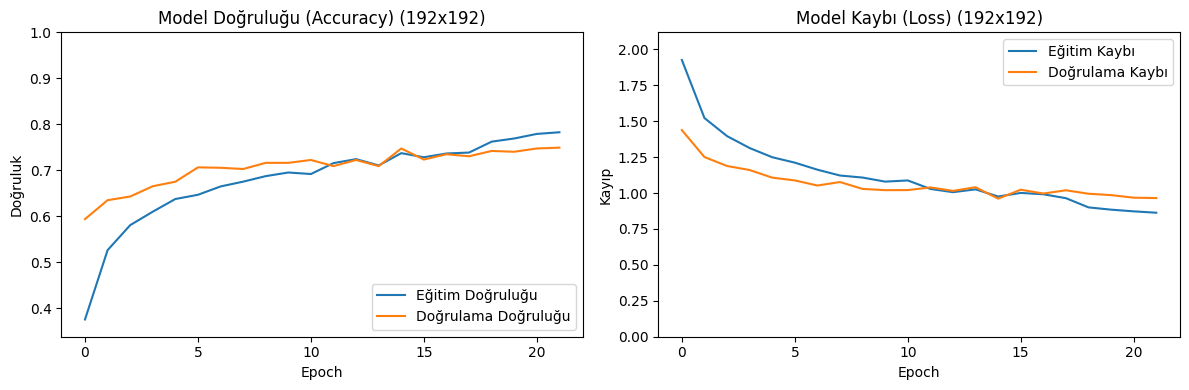

123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step

Eğitim ve Test setleri üzerinde tahminler yapıldı (192x192).

------ EĞİTİM SETİ PERFORMANS METRİKLERİ (192x192) ------
              precision    recall  f1-score   support

         PET       0.92      0.90      0.91       560
          PP       0.83      0.87      0.85       560
          PS       0.88      0.79      0.83       560
         PVC       0.85      0.85      0.85       559
        LDPE       0.82      0.84      0.83       560
        HDPE       0.76      0.85      0.80       560
       Other       0.94      0.87      0.90       560

    accuracy                           0.85      3919
   macro avg       0.86      0.85      0.86      3919
weighted avg       0.86      0.85      0.86      3919


------ TEST SETİ PERFORMANS METRİKLERİ (192x192) ------
              precision    recall  f1-score   support

         PET       0.85      0.75      0.79        80
          PP       0.72      0.74 

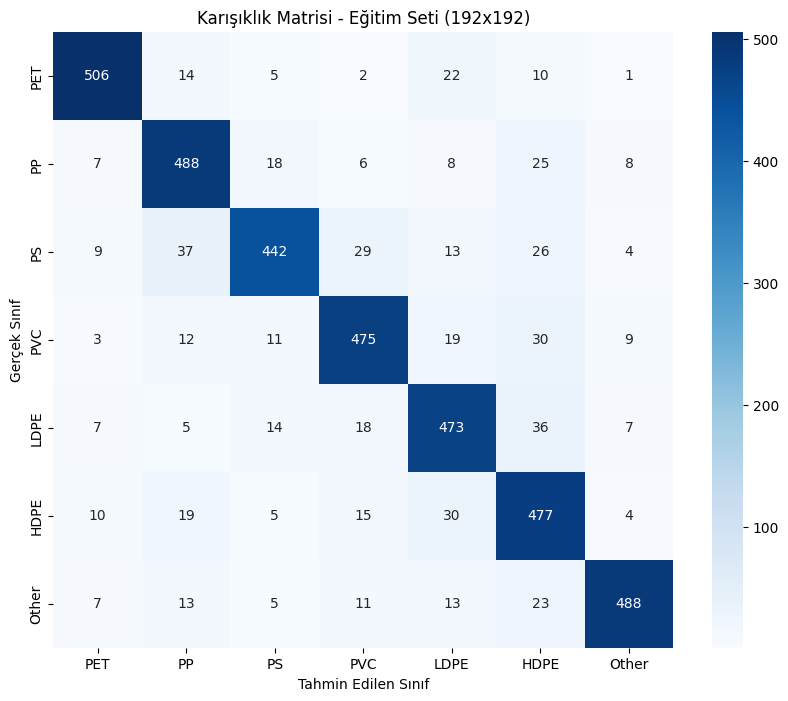

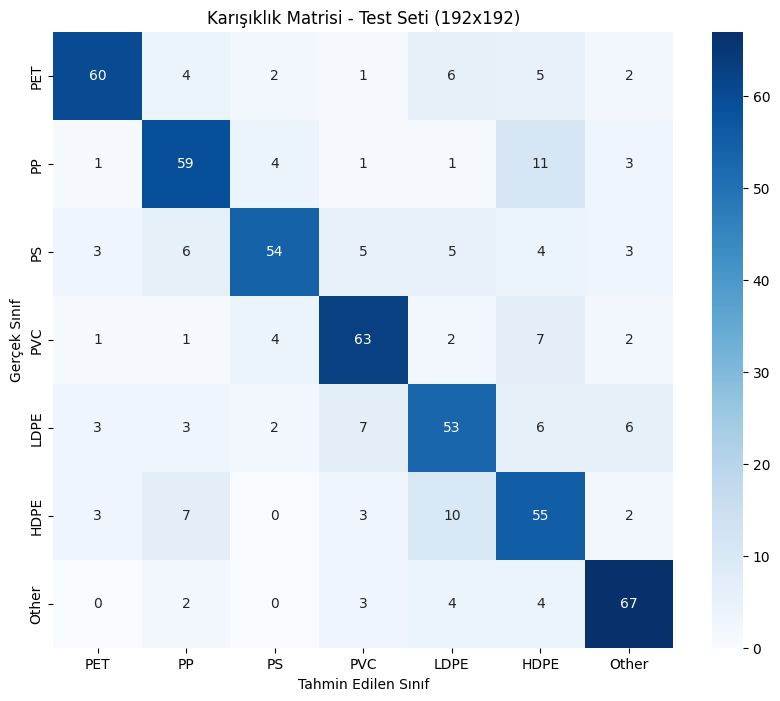

In [ ]:
# Colab Hücresi 7 (Yeni - Eğitim ve Değerlendirme 192x192)


# --- 1. Model Eğitimi ---
EPOCHS = 50
BATCH_SIZE = 32 # RAM durumuna göre gerekirse 16'ya düşürülebilir
                # 192x192 daha fazla RAM kullanır.

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7, # Önceki iyi çalışan değer
    restore_best_weights=True,
    verbose=1
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

print("\nModel eğitimi başlıyor (192x192)...")
history_192 = model_192.fit(
    X_train, y_train, # Bunlar yeni 192x192 boyutlu veriler olmalı
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
print("Model eğitimi tamamlandı.")

# --- 2. Modeli Kaydetme ---
MODEL_SAVE_PATH_192 = "/content/drive/MyDrive/plastik_siniflandirma_model_192"
if not os.path.exists(MODEL_SAVE_PATH_192):
    os.makedirs(MODEL_SAVE_PATH_192)
try:
    model_192.export(MODEL_SAVE_PATH_192)
    print(f"\nModel başarıyla '{MODEL_SAVE_PATH_192}' adresine kaydedildi.")
except Exception as e:
    print(f"\nModel kaydedilirken bir hata oluştu: {e}")

# --- 3. Eğitim ve Doğrulama Grafikleri ---
def plot_history(history_obj, title_suffix=""):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_obj.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history_obj.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.title(f'Model Doğruluğu (Accuracy) {title_suffix}')
    plt.ylabel('Doğruluk')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    # Y ekseni limitlerini veriye göre ayarla
    min_acc = min(min(history_obj.history.get('accuracy', [0])), min(history_obj.history.get('val_accuracy', [0]))) * 0.9
    plt.ylim([max(0, min_acc), 1.0])


    plt.subplot(1, 2, 2)
    plt.plot(history_obj.history['loss'], label='Eğitim Kaybı')
    plt.plot(history_obj.history['val_loss'], label='Doğrulama Kaybı')
    plt.title(f'Model Kaybı (Loss) {title_suffix}')
    plt.ylabel('Kayıp')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    max_loss = max(max(history_obj.history.get('loss', [1])), max(history_obj.history.get('val_loss', [1]))) * 1.1
    plt.ylim([0, max(1,max_loss)]) # Kaybın 0'dan başlamasını sağla
    plt.tight_layout()
    plt.show()

print("\n--- Eğitim ve Doğrulama Grafikleri (192x192) ---")
plot_history(history_192, title_suffix="(192x192)")

# --- 4. Tahminler Yapma ---
y_pred_train_probs_192 = model_192.predict(X_train, batch_size=BATCH_SIZE)
y_pred_train_classes_192 = np.argmax(y_pred_train_probs_192, axis=1)
y_true_train_classes = np.argmax(y_train, axis=1) # Bu zaten tanımlı olmalıydı

y_pred_test_probs_192 = model_192.predict(X_test, batch_size=BATCH_SIZE)
y_pred_test_classes_192 = np.argmax(y_pred_test_probs_192, axis=1)
y_true_test_classes = np.argmax(y_test, axis=1) # Bu zaten tanımlı olmalıydı

print("\nEğitim ve Test setleri üzerinde tahminler yapıldı (192x192).")

# --- 5. Performans Metrikleri ---
print("\n------ EĞİTİM SETİ PERFORMANS METRİKLERİ (192x192) ------")
print(classification_report(y_true_train_classes, y_pred_train_classes_192, target_names=CLASS_NAMES, zero_division=0))

print("\n------ TEST SETİ PERFORMANS METRİKLERİ (192x192) ------")
print(classification_report(y_true_test_classes, y_pred_test_classes_192, target_names=CLASS_NAMES, zero_division=0))

# --- 6. Karışıklık Matrisi ---
# plot_confusion_matrix_custom fonksiyonu önceki denemelerden tanımlı olmalı.
# Eğer runtime'ı yeniden başlattıysan tekrar tanımlaman gerekir:
def plot_confusion_matrix_custom(y_true, y_pred, class_names_list, title_suffix=""):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names_list, yticklabels=class_names_list)
    plt.title(f'Karışıklık Matrisi - {title_suffix}')
    plt.ylabel('Gerçek Sınıf')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.show()

print("\n--- Karışıklık Matrisleri (192x192) ---")
plot_confusion_matrix_custom(y_true_train_classes, y_pred_train_classes_192, CLASS_NAMES, title_suffix="Eğitim Seti (192x192)")
plot_confusion_matrix_custom(y_true_test_classes, y_pred_test_classes_192, CLASS_NAMES, title_suffix="Test Seti (192x192)")